In [2]:
import pandas as pd
import numpy as np

In [60]:
wine_df=pd.read_csv("wine-clustering.csv")

In [4]:
wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### kmeans 클러스터링

In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

kmeans=KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0)
kmeans.fit_predict(wine_df)

C:\Users\a0103\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [62]:
wine_df['cluster']=kmeans.labels_

In [63]:
wine_df.groupby(['cluster']).mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
cluster,,,,,,,,,,,,,
0,12.516667,2.494203,2.288551,20.823188,92.347826,2.070725,1.758406,0.390145,1.451884,4.086957,0.941159,2.490725,458.231884
1,13.804468,1.883404,2.426170,17.023404,105.510638,2.867234,3.014255,0.285319,1.910426,5.702553,1.078298,3.114043,1195.148936
2,12.929839,2.504032,2.408065,19.890323,103.596774,2.111129,1.584032,0.388387,1.503387,5.650323,0.883968,2.365484,728.338710


- pca 차원축소

In [64]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(wine_df.drop(columns=['cluster']))

In [65]:
wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [66]:
wine_df['pca_x']=pca_transformed[:,0]
wine_df['pca_y']=pca_transformed[:,1]

In [67]:
wine_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster,pca_x,pca_y
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,318.562979,21.492131
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,303.097420,-5.364718
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,438.061133,-6.537309
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,733.240139,0.192729
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,-11.571428,18.489995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2,-6.980211,-4.541137
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2,3.131605,2.335191
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2,88.458074,18.776285
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2,93.456242,18.670819


- 그래프로 나타내기

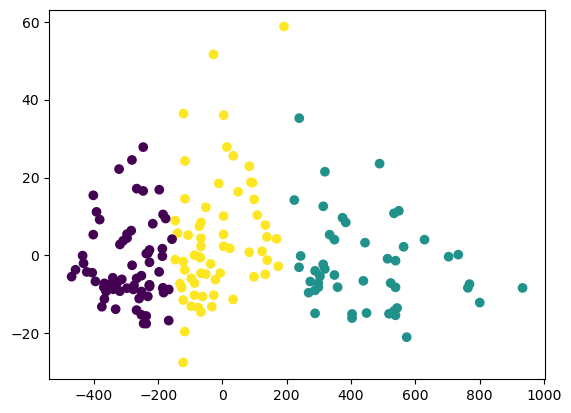

In [68]:
plt.scatter(x=wine_df.loc[:,'pca_x'],y=wine_df.loc[:,'pca_y'], c=wine_df['cluster'])

- 실루엣 스코어 분석

In [69]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [70]:
score_samples=silhouette_samples(wine_df.drop(columns=['cluster']), wine_df['cluster'])

In [71]:
wine_df['silhouette_coeff']=score_samples

<Axes: >

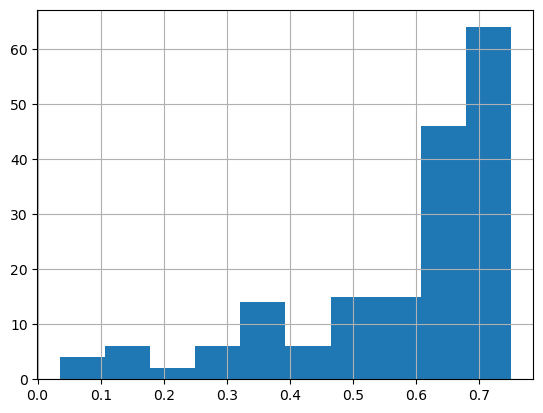

In [72]:
wine_df['silhouette_coeff'].hist()

In [23]:
average_score=silhouette_score(wine_df.drop(columns=['cluster']), wine_df['cluster'])
average_score

0.5716733334530576

- 각 클러스터가 어떤 특징을 나타내는지 파악

In [86]:
cluster1=wine_df[wine_df['cluster']==0].drop(columns=['pca_x','pca_y','silhouette_coeff']).reset_index()
cluster2=wine_df[wine_df['cluster']==1].drop(columns=['pca_x','pca_y','silhouette_coeff']).reset_index()
cluster3=wine_df[wine_df['cluster']==2].drop(columns=['pca_x','pca_y','silhouette_coeff']).reset_index()

In [88]:
cluster1.columns

Index(['index', 'Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'cluster'],
      dtype='object')

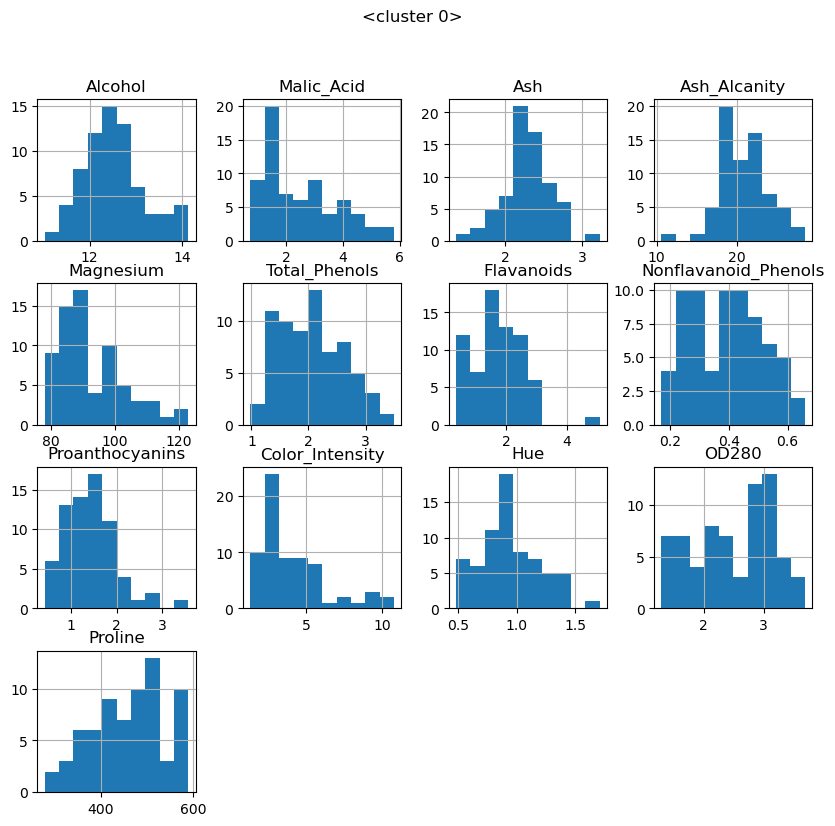

In [102]:
cluster1.drop(columns=['index','cluster']).hist(figsize=(10,9))
plt.suptitle('<cluster 0>')
plt.show()

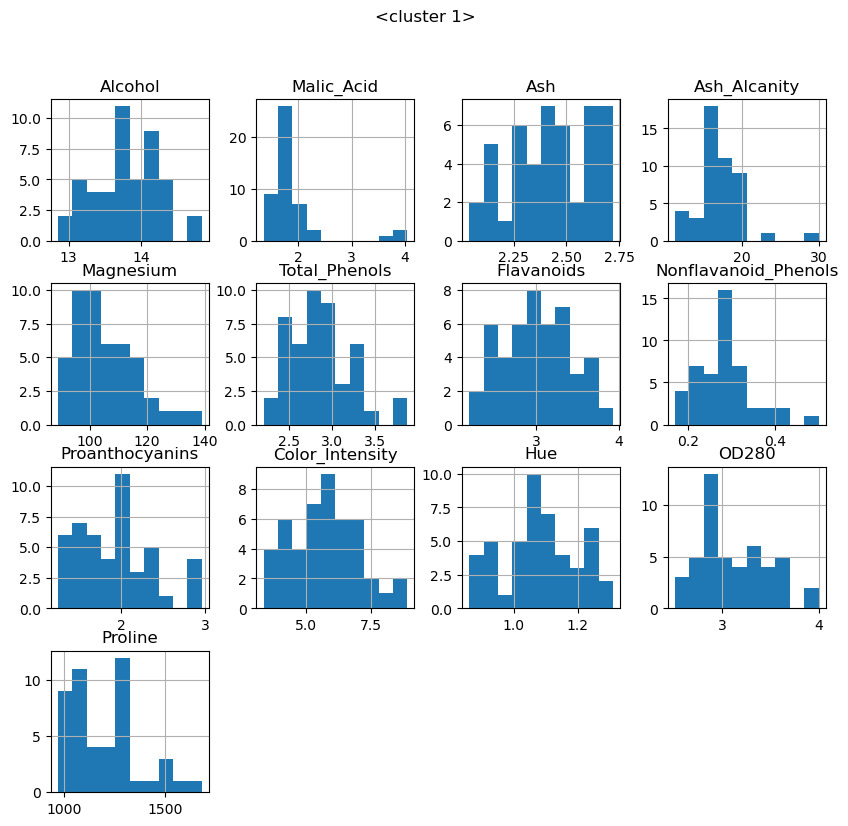

In [103]:
cluster2.drop(columns=['index','cluster']).hist(figsize=(10,9))
plt.suptitle('<cluster 1>')
plt.show()

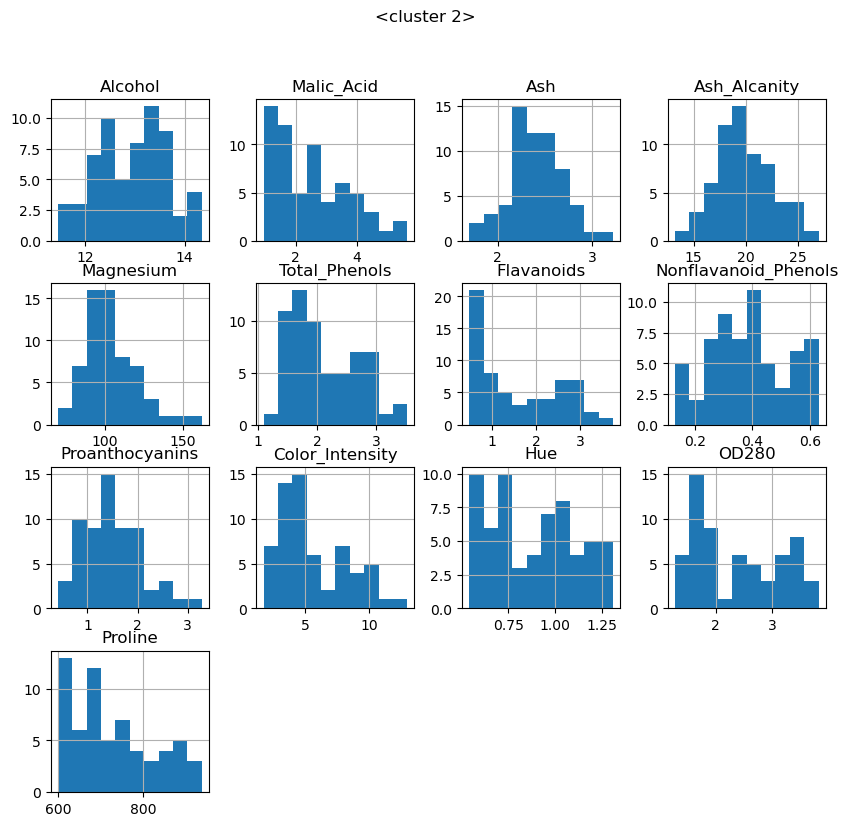

In [104]:
cluster3.drop(columns=['index','cluster']).hist(figsize=(10,9))
plt.suptitle('<cluster 2>')
plt.show()

In [108]:
wine_df.drop(columns=['pca_x','pca_y', 'silhouette_coeff']).groupby(['cluster']).mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
cluster,,,,,,,,,,,,,
0,12.516667,2.494203,2.288551,20.823188,92.347826,2.070725,1.758406,0.390145,1.451884,4.086957,0.941159,2.490725,458.231884
1,13.804468,1.883404,2.426170,17.023404,105.510638,2.867234,3.014255,0.285319,1.910426,5.702553,1.078298,3.114043,1195.148936
2,12.929839,2.504032,2.408065,19.890323,103.596774,2.111129,1.584032,0.388387,1.503387,5.650323,0.883968,2.365484,728.338710


### MeanShift 클러스터링

In [57]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
%matplotlib inline

In [27]:
wine_df=pd.read_csv("wine-clustering.csv")

In [34]:
best_bandwidth=estimate_bandwidth(wine_df, quantile=0.25)
round(best_bandwidth,2)

156.32

In [35]:
meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(wine_df)
print(np.unique(cluster_labels))

[0 1 2 3]


In [38]:
wine_df['cluster']=cluster_labels

In [41]:
pca=PCA(n_components=2)

In [44]:
pca_transformed=pca.fit_transform(wine_df.drop(columns=['cluster']))

In [46]:
wine_df['pca_x']=pca_transformed[:,0]
wine_df['pca_y']=pca_transformed[:,1]

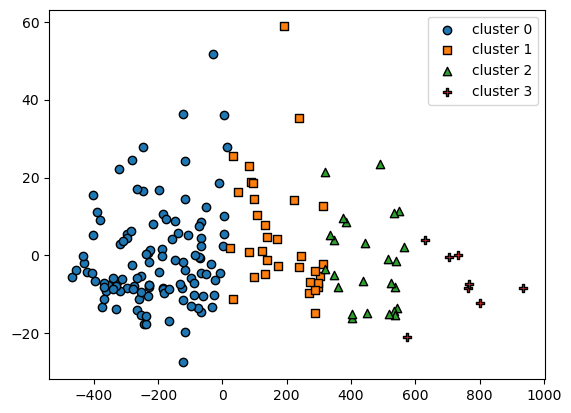

In [56]:
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']


for label in unique_labels:
    label_cluster=wine_df[wine_df['cluster']==label]
    label_name='cluster '+str(label)
    plt.scatter(x=label_cluster['pca_x'], y=label_cluster['pca_y'], edgecolor='k', marker=markers[label], label=label_name)
   
plt.legend()
plt.show()


In [59]:
average_score=silhouette_score(wine_df.drop(columns=['cluster','pca_x','pca_y']), wine_df['cluster'])
average_score

0.5271148679235635

### 요소들과 와인맛의 상관관계 by GPT

1. Alcohol (알코올):
- 알코올은 와인의 바디(무게감)와 풍미에 중요한 영향을 미칩니다. 일반적으로 알코올 함량이 높으면 더 강렬하고 무거운 맛을 가지며, 낮으면 부드럽고 가벼운 맛을 줄 수 있습니다.
2. Malic Acid (말산):
- 말산은 와인의 산미에 기여합니다. 높은 말산 함량은 와인에 더 신선하고 상큼한 산미를 제공합니다. 낮은 말산 함량은 더 부드럽고 둥근 맛을 줄 수 있습니다. 과도한 말산은 종종 "초산"과 같은 맛을 줄 수 있습니다.
3. Ash (회분):
- 회분은 와인 성분 중 무기질의 양을 나타냅니다. 직접적인 맛에는 큰 영향을 미치지 않지만, 미네랄리티가 있는 와인의 풍미와 관련될 수 있습니다.
4. Ash Alcanity (회분 알칼리도):
- 알칼리도는 와인의 산성도를 중화시키는 능력과 관련이 있습니다. 높은 알칼리도는 산도가 낮아지고, 더 부드러운 맛을 제공할 수 있습니다. 산도가 높으면 와인이 더 신선하고 생동감 있는 맛을 줄 수 있습니다.
5. Magnesium (마그네슘):
- 마그네슘은 미네랄리티와 관련된 요소로, 와인의 맛에 미묘한 영향을 미칠 수 있습니다. 마그네슘 함량이 높을수록 미네랄리티를 더 느낄 수 있는 경향이 있지만, 이는 미미한 영향입니다.
6. Total Phenols (총 폴리페놀):
- 폴리페놀은 와인의 구조와 떫은맛(탄닌), 색상에 큰 영향을 미칩니다. 폴리페놀이 많을수록 와인의 구조가 탄탄하고, 떫은 맛이 강해질 수 있습니다. 이는 특히 레드 와인에서 중요한 요소입니다.
7. Flavanoids (플라보노이드):
- 플라보노이드는 와인의 떫은맛과 쓴맛에 기여합니다. 플라보노이드 함량이 높을수록 와인의 탄닌 구조가 강해지고, 떫은맛이 더 두드러질 수 있습니다.
8. Nonflavanoid Phenols (비플라보노이드 폴리페놀):
- 비플라보노이드 폴리페놀은 플라보노이드와는 다른 방식으로 와인의 떫은맛이나 쓴맛에 기여하지만, 그 영향은 상대적으로 작을 수 있습니다.
9. Proanthocyanins (프로안토시아니딘):
- 프로안토시아니딘은 탄닌과 관련된 화합물로, 와인의 떫은맛과 바디에 영향을 미칩니다. 높은 프로안토시아니딘 함량은 와인을 더 떫고 무거운 맛으로 만들 수 있습니다.
10. Color Intensity (색상 강도):
- 색상 강도는 와인의 농도와 깊이에 대한 시각적인 지표로, 종종 풍미의 강도와 연관될 수 있습니다. 더 진한 색을 가진 와인은 더 강렬한 맛을 나타내는 경우가 많습니다.
11. Hue (색조):
- 색조는 와인의 나이와 산화 정도와 관련이 있습니다. 색조가 변하면 와인의 맛도 변할 수 있으며, 색조가 낮으면 더 성숙하거나 산화된 와인일 가능성이 높습니다.
12. OD280 (OD280 값):
- OD280 값은 폴리페놀 함량을 나타내며, 떫은맛과 구조에 영향을 미칩니다. OD280 값이 높을수록 더 강한 탄닌 맛을 느낄 수 있습니다.
13. Proline (프롤린):
- 프롤린은 와인의 아미노산으로, 와인의 풍미와 복합성에 기여할 수 있습니다. 특히 프롤린 함량이 높은 와인은 더 복합적이고 무게감 있는 맛을 가질 가능성이 큽니다.

요약:
와인의 바디와 강도: 알코올, 플라보노이드, 총 폴리페놀, 프로안토시아니딘 등이 와인의 바디, 강한 맛과 관련 있습니다.
산미: 말산과 회분 알칼리도는 와인의 산미와 신선한 느낌에 영향을 줍니다.
떫은맛과 구조: 플라보노이드, 총 폴리페놀, 프로안토시아니딘이 떫은맛과 와인의 구조를 형성하는 중요한 요소입니다.